# Clustering Crypto

In [219]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Deliverable 1: Preprocessing the Data for PCA

In [220]:
# Load the crypto_data.csv dataset.
file_path = "Resources/crypto_data.csv"
crypto_df = pd.read_csv(file_path, index_col="Unnamed: 0")
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [221]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df.loc[crypto_df["IsTrading"] == True]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [222]:
# Keep all the cryptocurrencies that have a working algorithm.
# THIS ISN'T REFERENCED IN OUR INSTRUCTIONS

In [223]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(["IsTrading"], axis = 1)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [224]:
for column in crypto_df.columns:
        print(f"column {column} has {crypto_df[column].isnull().sum()} null values")

column CoinName has 0 null values
column Algorithm has 0 null values
column ProofType has 0 null values
column TotalCoinsMined has 459 null values
column TotalCoinSupply has 0 null values


In [225]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [226]:
# Keep the rows where coins are mined.
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] > 0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [227]:
# Create a new DataFrame that holds only the cryptocurrencies names.
selected_columns = crypto_df[['CoinName']]
df2 = selected_columns.copy()
df2

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [228]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(["CoinName"], axis = 1)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [229]:
# Use get_dummies() to create variables for text features.
crypto_df1 = pd.get_dummies(crypto_df, columns=["Algorithm", 'ProofType'])
crypto_df1

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
# Standardize the data with StandardScaler().
#crypto_df.dtypes
data_scaler = StandardScaler()
crypto_df_scaled = data_scaler.fit_transform(crypto_df1)
crypto_df_scaled[:5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

### Deliverable 2: Reducing Data Dimensions Using PCA

In [231]:
# Using PCA to reduce dimension to three principal components.
# Initialize PCA model
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_df_scaled)
crypto_pca

array([[-0.32892483,  1.08391012, -0.5611957 ],
       [-0.31224685,  1.08408819, -0.56160529],
       [ 2.31223407,  1.61831975, -0.66121241],
       ...,
       [ 0.33211244, -2.31238506,  0.40941732],
       [-0.15156256, -2.01632573,  0.41677538],
       [-0.2798876 ,  0.87375709, -0.25340878]])

In [232]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data=crypto_pca, columns=["pc1", "pc2", "pc3"]
)
pcs_df.index = df2.index
pcs_df

,pc1,pc2,pc3
42,-0.328925,1.083910,-0.561196
404,-0.312247,1.084088,-0.561605
1337,2.312234,1.618320,-0.661212
BTC,-0.146176,-1.354912,0.171761
ETH,-0.143578,-2.100166,0.296442
...,...,...,...
ZEPH,2.457294,0.775829,-0.023265
GAP,-0.326968,1.083797,-0.561223
BDX,0.332112,-2.312385,0.409417
ZEN,-0.151563,-2.016326,0.416775


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [233]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

C:\opt\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [234]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0,

In [241]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.merge(crypto_df, pcs_df, left_index=True, right_index=True)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = pd.merge(clustered_df, df2, left_index=True, right_index=True)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["class"] = predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,pc1,pc2,pc3,CoinName,class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.328925,1.083910,-0.561196,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.312247,1.084088,-0.561605,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.312234,1.618320,-0.661212,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.146176,-1.354912,0.171761,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.143578,-2.100166,0.296442,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.158658,-1.074373,-0.002583,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.410637,1.191347,-0.539523,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.156035,-2.231677,0.420919,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.142018,-2.100263,0.296422,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.151562,-2.016326,0.416775,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

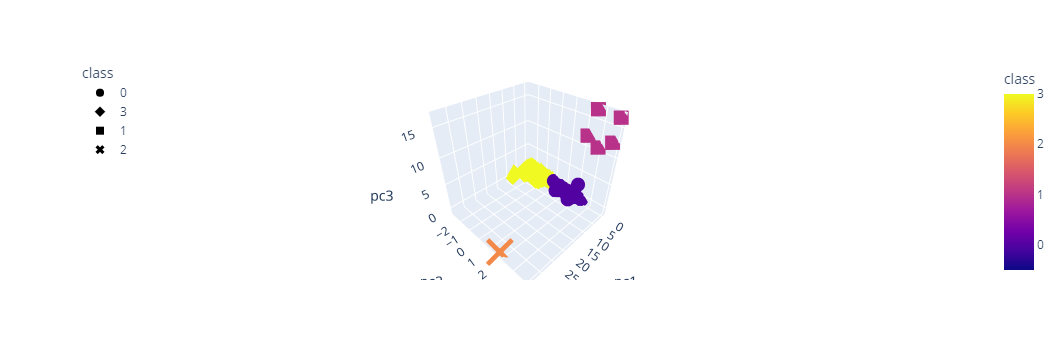

In [255]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="pc1",
    y="pc2",
    z="pc3",
    color="class",
    symbol="class",
    width=800,
    hover_name="CoinName",
    hover_data=['class','pc1','pc2','pc3','Algorithm']
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [257]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'class'], sortable=True, slectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [263]:
# Print the total number of tradable cryptocurrencies.
print(f"There are {clustered_df['CoinName'].count()} tradable cryptocurrencies.")

There are 532 tradable cryptocurrencies.


In [275]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
clustered_df_scaled = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])
clustered_df_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [280]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(
    data=clustered_df_scaled, columns=["TotalCoinSupply", "TotalCoinsMined"]
)
plot_df.index = df2.index

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df = pd.merge(plot_df, clustered_df['CoinName'], left_index=True, right_index=True)

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df = pd.merge(plot_df, clustered_df['class'], left_index=True, right_index=True)

plot_df

,TotalCoinSupply,TotalCoinsMined,CoinName,class
42,4.200000e-11,0.000000e+00,42 Coin,0
404,5.320000e-04,1.065855e-03,404Coin,0
1337,3.141593e-01,2.957551e-02,EliteCoin,0
BTC,2.100000e-05,1.810842e-05,Bitcoin,3
ETH,0.000000e+00,1.087731e-04,Ethereum,3
...,...,...,...,...
ZEPH,2.000000e-03,2.020225e-03,ZEPHYR,0
GAP,2.500000e-04,1.508199e-05,Gapcoin,0
BDX,1.400223e-03,9.901351e-04,Beldex,3
ZEN,2.100000e-05,7.370282e-06,Horizen,3


In [281]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    hover_cols=["class"],
    by="class",
)


:NdOverlay   [class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,class)